# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('/content/demo01_dummies.csv')
df = df.set_index('Unnamed: 0').reset_index(drop=True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   int64  
 10  posse_de_veiculo_Y                      6770 non-null   int6

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
2,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
3,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,27.482192,4.024658,1,0,1,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,34.857534,3.101370,1,1,1,0,1.0,True,0,...,0,0,1,0,0,1,0,0,0,0
6766,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,0,0,0,0,1,0,0,0,0
6767,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
6768,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0


In [3]:
# Definindo o target
y = df['mau']

In [4]:
# Definindo as variáveis explicativas
X = df.drop('mau',axis=1)

In [5]:
# Definindo a proporção de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
# Definindo a arvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

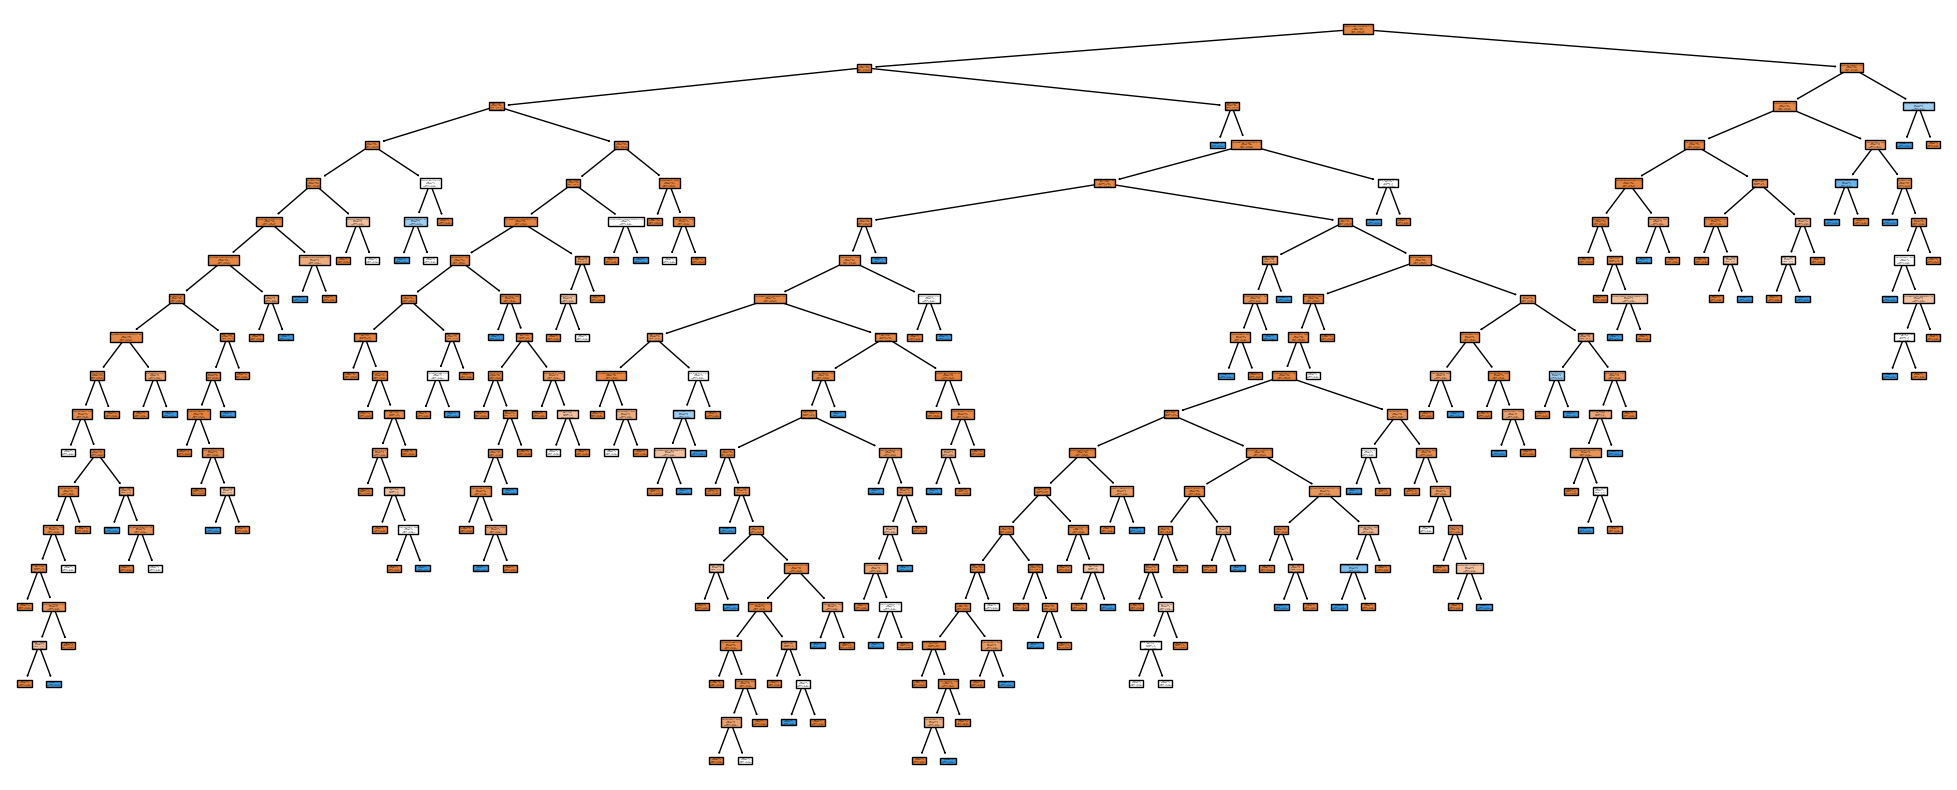

In [7]:
# Visualizando a arvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

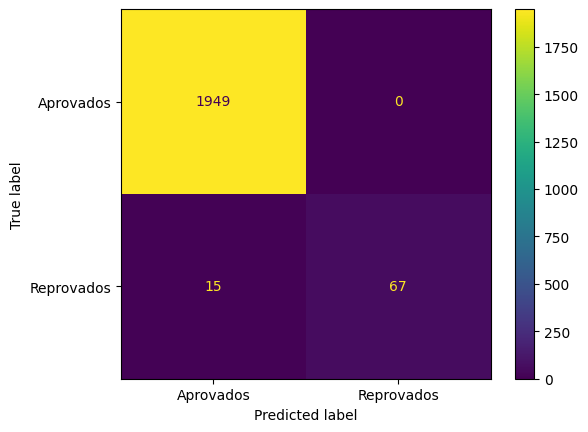

In [8]:
# Plotando a matrix de confusão, a tabela de verdade para o treino
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [9]:
# Calculando a acurácia do treino
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9926144756277696

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [10]:
# Colocando o modelo à prova, testando para as variáveis de teste
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)

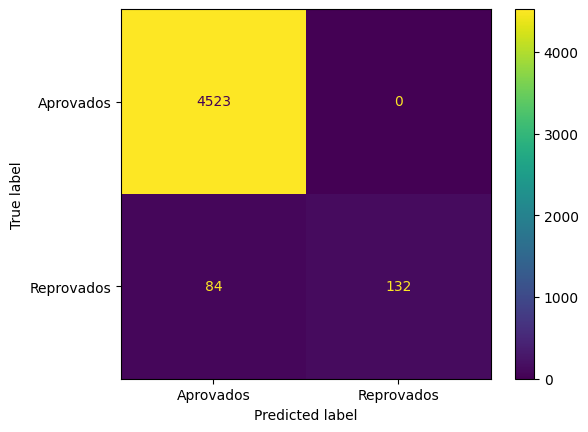

In [11]:
# Plotando a matriz confusão das variáveis de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [12]:
# Acurácia da base de teste (0.98), próxima à acurácia da base de treinamento (0.979)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.982274741506647

In [13]:
# Treinando nova árvore de decisão utilizando os parametros da atividade
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

In [14]:
# Plotando a a matriz de classificação da árvore de decisão
plt.figure(figsize=[100,100])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

In [15]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [16]:
# Bons
proporcao_aprovados*100

97.21460223675881

In [17]:
# Maus (menos de 1%)
proporcao_reprovados*100

2.7853977632411904

realizando com todos com a acuracia como bom

In [18]:
# Alterando todos os valores da coluna mau para bons pagadores
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

False    6770
Name: mau, dtype: int64

In [19]:
# Definindo o target
y = df['mau']
# Definindo as variáveis explicativas
X = df.drop('mau',axis=1)

In [20]:
# Treinando nova árvore de decisão utilizando os parametros da atividade
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

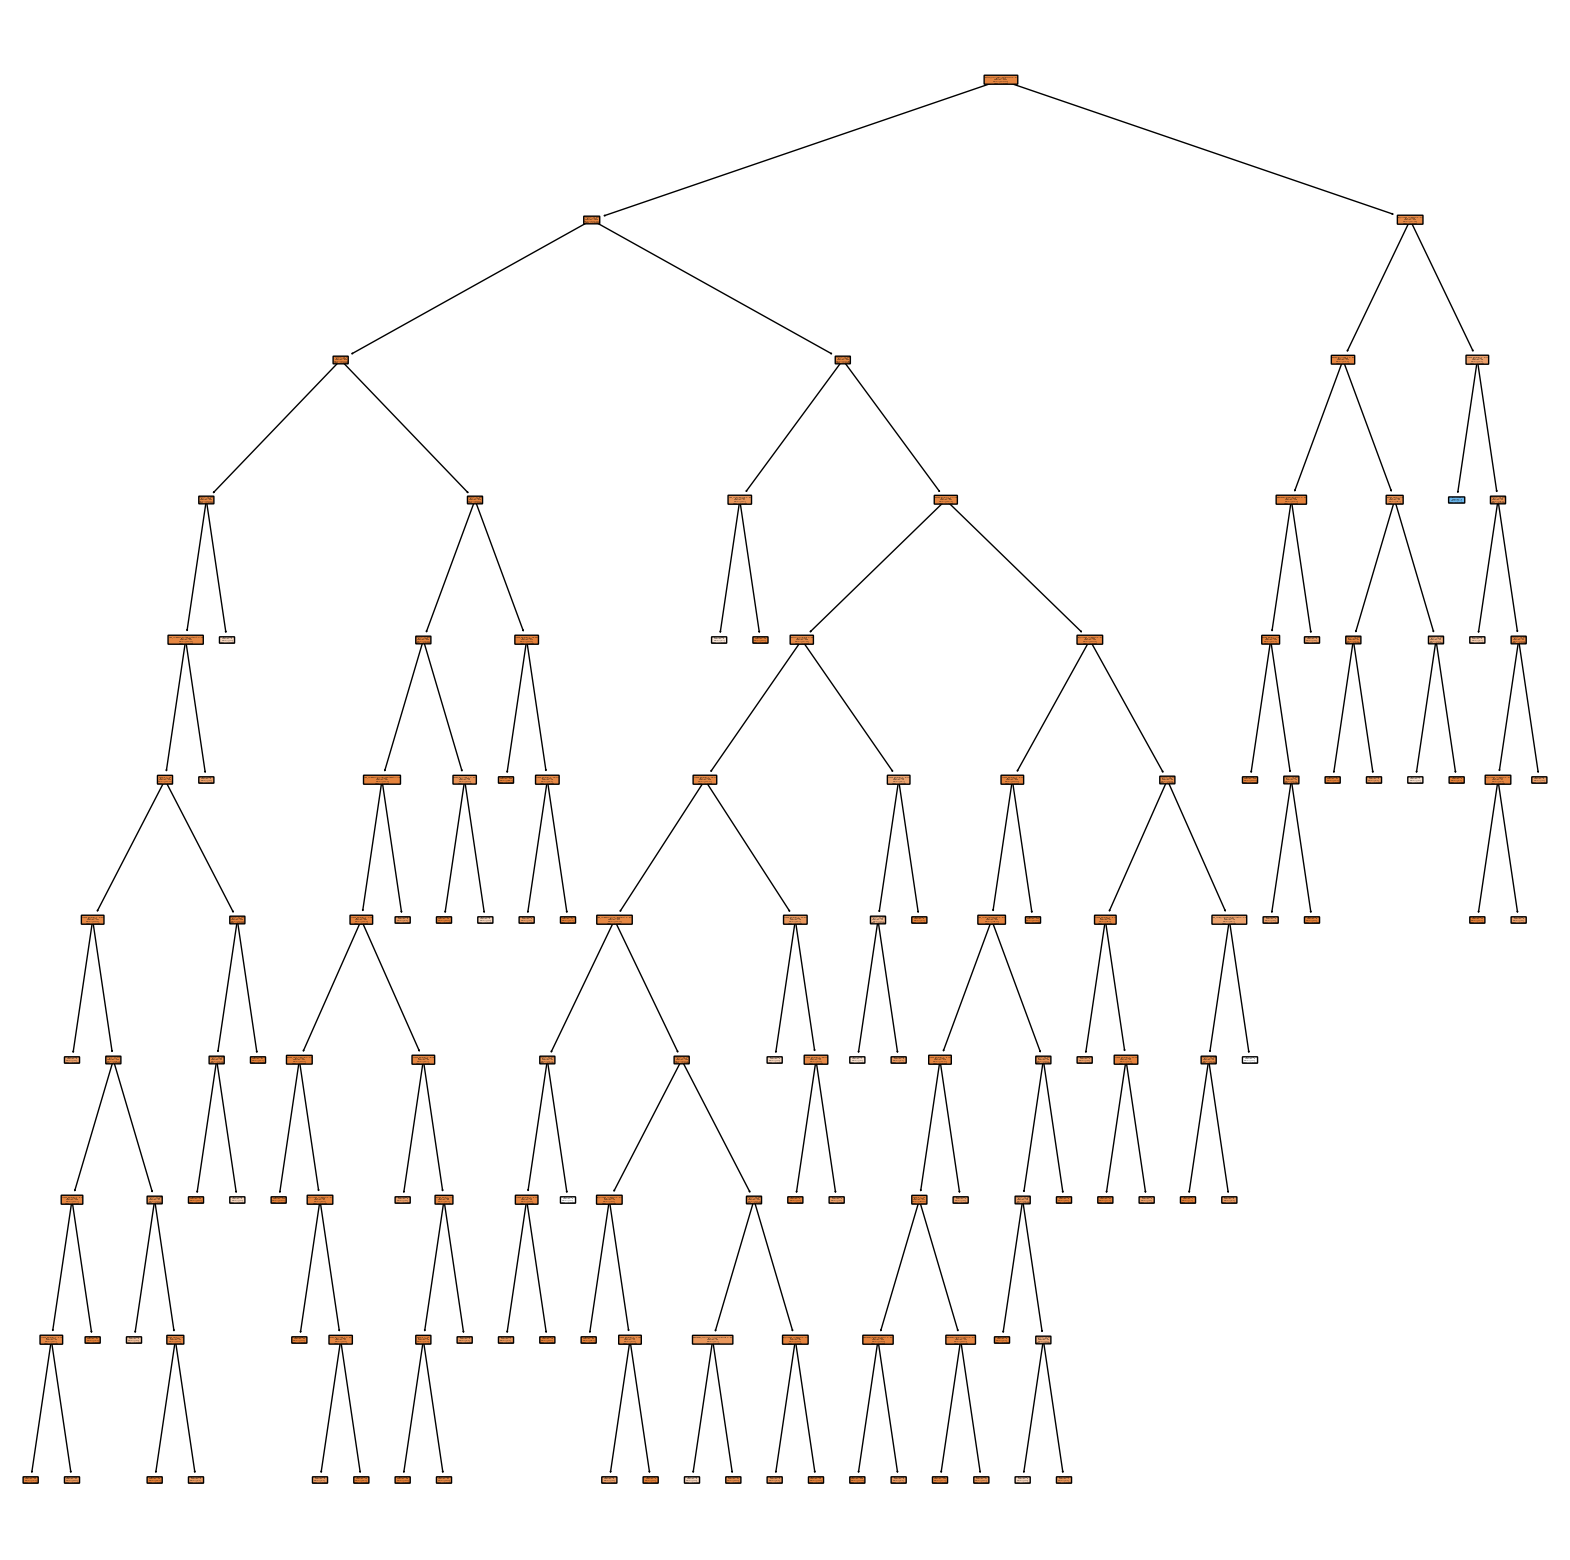

In [21]:
# Plotando a a matriz de classificação da árvore de decisão
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

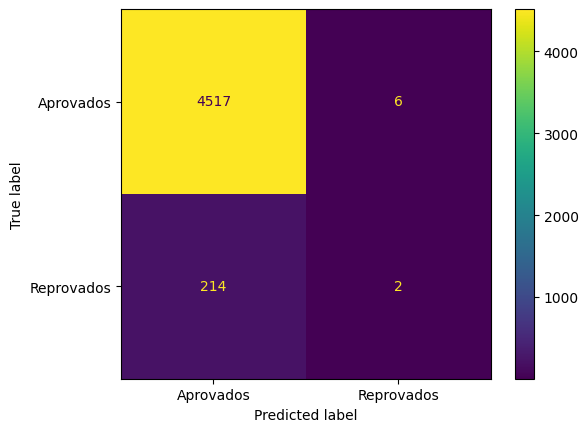

In [22]:
# Plotando a matriz confusão das variáveis de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [23]:
# Acurácia da base de treino
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9611029049729197

In [24]:
# Acurácia da base de teste igual a de treino
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9535767039459802

In [25]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [26]:
proporcao_aprovados

0.9983118801434901

In [27]:
proporcao_reprovados

0.0016881198565098122